In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation) 

import nazca as nd
nd.logfile(name='tutorial.log', stdout=False)
import solver as sv

from nazca import demofab as demo



MMI=demo.mmi2x2_sh()

def add_drop(radius):
    with nd.Cell(name=f'Shallow_AddDrop_R{radius:.4}') as C:
        M1 = MMI.put()
        demo.shallow.bend(angle=180.0,radius=radius).put()
        M2 = MMI.put()    
        demo.shallow.bend(angle=180.0,radius=radius).put()
        t = demo.shallow.strt(100.0).put(M1.pin['a1'])
        nd.Pin('a0',pin=t.pin['b0']).put()
        t = demo.shallow.strt(100.0).put(M2.pin['b1'])
        nd.Pin('a1',pin=t.pin['b0']).put()
        t = demo.shallow.strt(100.0).put(M1.pin['b1'])
        nd.Pin('b0',pin=t.pin['b0']).put()
        t = demo.shallow.strt(100.0).put(M2.pin['a1'])
        nd.Pin('b1',pin=t.pin['b0']).put()
    return C

...creating log file 'tutorial.log'


# Nazca circuit validator
## Brought to JePPIX by Bright Photonic

<img src="files/logo-nazca.png" align="left" width="200">
<img src="files/logo_brightphotonics.png" align="left" width="200">

## How can we be sure we draw the right circuit?

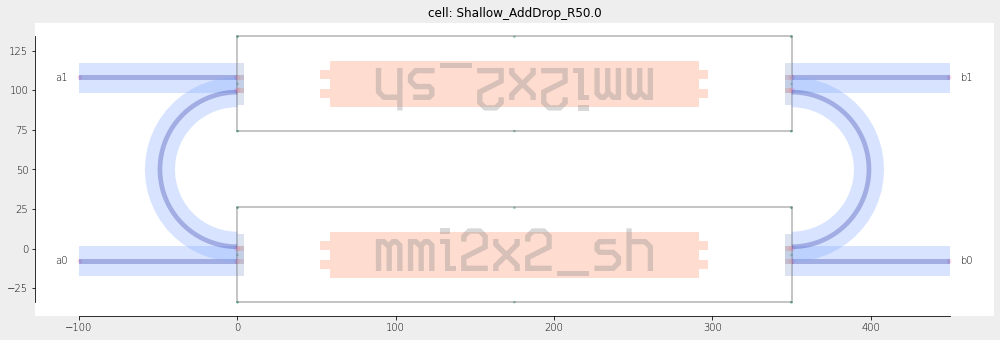

In [3]:
R = add_drop(50.0)
nd.export_plt(topcells=R)

## We could asses the funcionality of the circuit directly form the layout code!

Text(0, 0.5, 'Transmission (a0 -> a1)')

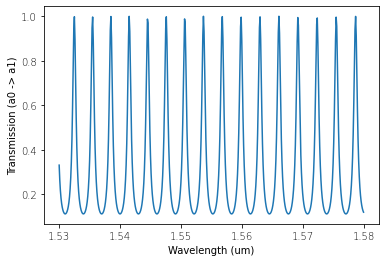

In [4]:
Sol = nd.get_solver(R)
T   = Sol.solve(wl=np.linspace(1.530, 1.580, 501)).get_data('a0', 'a1')
plt.plot(T['wl'], T['T'])
plt.xlabel('Wavelength (um)')
plt.ylabel('Transmission (a0 -> a1)')

## Scattering Matrix Approach
<img src="files/Smatrix.png"  width="1000">

### Waveguide Scattering Matrix 

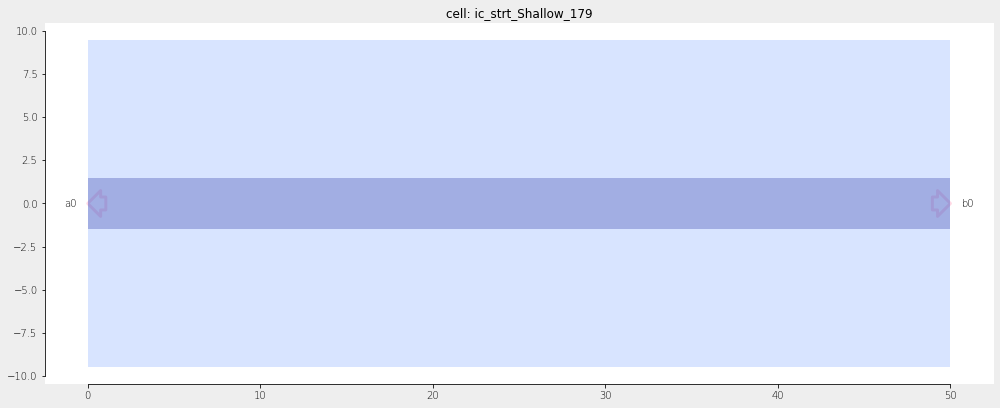

             a0        b0       
 a0        0.0000+0.0000j  -0.6121-0.7908j 
 b0        -0.6121-0.7908j  0.0000+0.0000j 

             a0        b0       
 a0          0.0000    1.0000 
 b0          1.0000    0.0000 



In [5]:
wg = demo.shallow.strt(50.0)
nd.export_plt(topcells=wg)
Mod = nd.get_solver(wg).solve(wl=1.55)
Mod.print_S()
Mod.print_S(np.abs)

### MMI Scattering Matrix

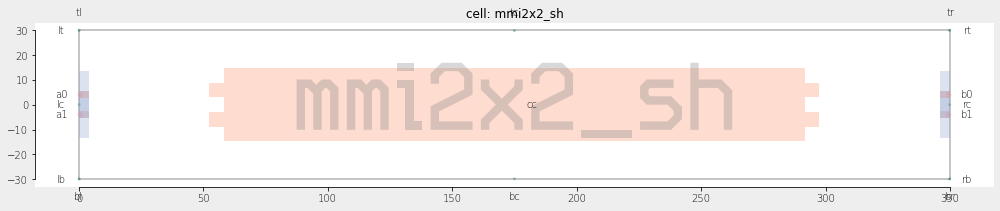

             a0        a1        b0        b1       
 a0        0.0000+0.0000j  0.0000+0.0000j  0.0000+0.7071j  0.7071+0.0000j 
 a1        0.0000+0.0000j  0.0000+0.0000j  -0.7071+0.0000j  0.0000-0.7071j 
 b0        0.0000-0.7071j  0.7071+0.0000j  0.0000+0.0000j  0.0000+0.0000j 
 b1        -0.7071+0.0000j  0.0000+0.7071j  0.0000+0.0000j  0.0000+0.0000j 

             a0        a1        b0        b1       
 a0          0.0000    0.0000    0.7071    0.7071 
 a1          0.0000    0.0000    0.7071    0.7071 
 b0          0.7071    0.7071    0.0000    0.0000 
 b1          0.7071    0.7071    0.0000    0.0000 



In [6]:
nd.export_plt(topcells=MMI)
Mod = nd.get_solver(MMI).solve(wl=1.55)
Mod.print_S()
Mod.print_S(np.abs)

## How does it work?

### Layout as normal

In [7]:
def add_drop(radius):
    """Function for creating and Add-Drop filter in shallow waveguide
    """
    with nd.Cell(name=f'Shallow_AddDrop_R{radius:.4}') as C:
        M1 = MMI.put()
        demo.shallow.bend(angle=180.0,radius=radius).put()
        M2 = MMI.put()    
        demo.shallow.bend(angle=180.0,radius=radius).put()
        t = demo.shallow.strt(100.0).put(M1.pin['a1'])
        nd.Pin('a0',pin=t.pin['b0']).put()
        t = demo.shallow.strt(100.0).put(M2.pin['b1'])
        nd.Pin('a1',pin=t.pin['b0']).put()
        t = demo.shallow.strt(100.0).put(M1.pin['b1'])
        nd.Pin('b0',pin=t.pin['b0']).put()
        t = demo.shallow.strt(100.0).put(M2.pin['a1'])
        nd.Pin('b1',pin=t.pin['b0']).put()
    return C

### Create a cell

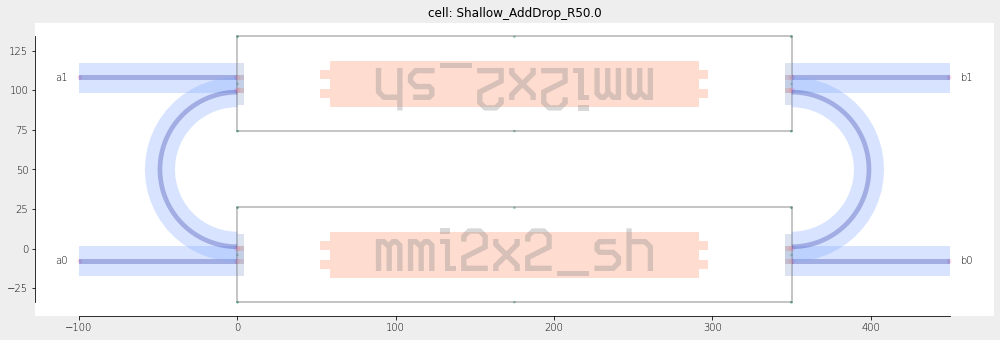

In [8]:
R = add_drop(50.0)
nd.export_plt(topcells=R)

### Assess the functionality of the same circuit we draw!

In [9]:
Sol = nd.get_solver(R)
print(Sol)

Solver of Shallow_AddDrop_R50.0 (id=139988572664272)


In [10]:
wll = np.linspace(1.53, 1.58, 501)
Mod = Sol.solve(wl=wll)
print(Mod)

Model object (id=139988572665560) with pins: ['a0', 'a1', 'b0', 'b1']


In [11]:
T = Mod.get_data('a0','b0')
print(T)

         wl         T        dB     Phase           Amplitude
0    1.5300  0.669551 -1.742165 -2.324016 -0.559683-0.596913j
1    1.5301  0.736691 -1.327143 -2.551443 -0.713131-0.477636j
2    1.5302  0.783671 -1.058665 -2.761007 -0.821909-0.328840j
3    1.5303  0.816981 -0.877878 -2.957991 -0.888678-0.165021j
4    1.5304  0.840882 -0.752650  3.137188 -0.916987+0.004039j
..      ...       ...       ...       ...                 ...
496  1.5796  0.830901 -0.804509  2.054211 -0.423688+0.807087j
497  1.5797  0.849873 -0.706462  1.881105 -0.281500+0.877855j
498  1.5798  0.863825 -0.635742  1.712867 -0.131600+0.920058j
499  1.5799  0.873969 -0.585037  1.548200  0.021123+0.934625j
500  1.5800  0.881112 -0.549689  1.386100  0.172386+0.922711j

[501 rows x 5 columns]


### and plot some stuff

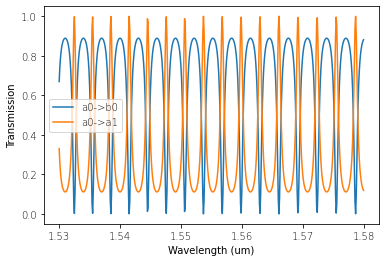

In [12]:
Tb0 = Mod.get_data('a0','b0')
Ta1 = Mod.get_data('a0','a1')

plt.plot(Tb0['wl'], Tb0['T'], label = 'a0->b0')
plt.plot(Ta1['wl'], Ta1['T'], label = 'a0->a1')
plt.plot()
plt.xlabel('Wavelength (um)')
plt.ylabel('Transmission')
plt.legend()


## Full hierarchy

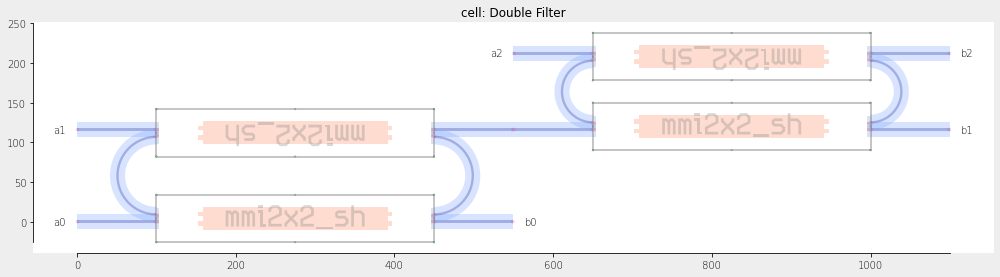

In [13]:
R_50 = add_drop(50.0)
R_40 = add_drop(40.0)

with nd.Cell(name='Double Filter') as DR:
    r1 = R_50.put()
    r2 = R_40.put('a0', r1.pin['b1'])
    nd.Pin('a0', pin=r1.pin['a0']).put()
    nd.Pin('a1', pin=r1.pin['a1']).put()
    nd.Pin('a2', pin=r2.pin['a1']).put()
    nd.Pin('b0', pin=r1.pin['b0']).put()
    nd.Pin('b1', pin=r2.pin['b0']).put()
    nd.Pin('b2', pin=r2.pin['b1']).put()
nd.export_plt(topcells=DR)

### Get detailed results out

In [14]:
Solvers = nd.get_solver(DR, fullreturn=True)
print(Solvers[R_50.cnode])
print(Solvers[R_40.cnode])
print(Solvers[DR.cnode])

Solver of Shallow_AddDrop_R50.0 (id=139988361848928)
Solver of Shallow_AddDrop_R40.0 (id=139988572611640)
Solver of Double Filter (id=139988361924560)


Text(0, 0.5, 'Transmission')

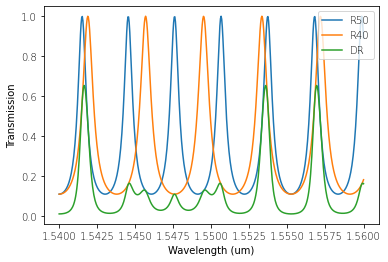

In [15]:
wll  = np.linspace(1.54, 1.56, 501)
T_50 = Solvers[R_50.cnode].solve(wl=wll).get_data('a0','a1')
T_40 = Solvers[R_40.cnode].solve(wl=wll).get_data('a0','a1')
T_DR = Solvers[DR.cnode].solve(wl=wll).get_data('a2','b0')

plt.plot(T_50['wl'], T_50['T'], label = 'R50')
plt.plot(T_40['wl'], T_40['T'], label = 'R40')
plt.plot(T_DR['wl'], T_DR['T'], label = 'DR')
plt.legend()
plt.xlabel('Wavelength (um)')
plt.ylabel('Transmission')

## Custom model definition

### Definition of a thermal phase shifter

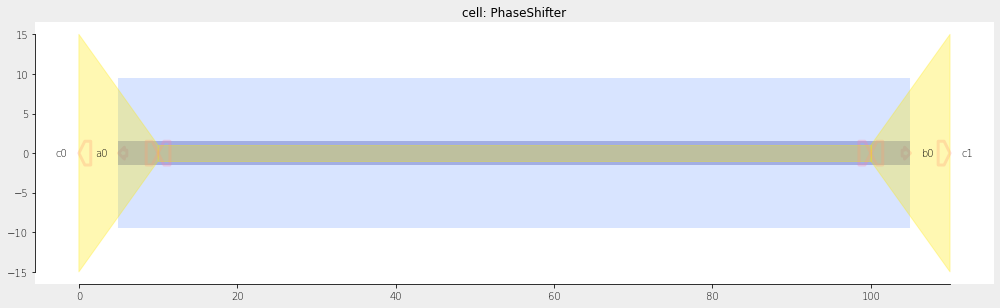

In [16]:
xsShallow=nd.get_xsection('Shallow')
with nd.Cell(name='PhaseShifter') as PS:
    t1=demo.metaldc.taper(width2=2.0, length=10.0).put()
    demo.metaldc.strt(90.0,width=2.0).put()
    t2=demo.metaldc.taper(width1=2.0, length=10.0).put()
    
    wg=demo.shallow.strt(100.0).put(5.0,0.0,0.0)
    
    nd.Pin('c0', pin=t1.pin['a0']).put()
    nd.Pin('c1', pin=t2.pin['b0']).put()
    nd.Pin('a0', pin=wg.pin['a0']).put()
    nd.Pin('b0', pin=wg.pin['b0']).put()
    
    PS.model_info['model'] = sv.TH_PhaseShifter(100.0,xsShallow.Neff)
  
nd.export_plt(topcells=PS)

In [17]:
with nd.Cell(name='DC_pad') as DCp:
    demo.metaldc.strt(100.0, width=100.0).put(-50.0,0,0)
    nd.Pin('a0', xs=demo.metaldc.xs).put(0,0,90.0)
    


### Let's use it

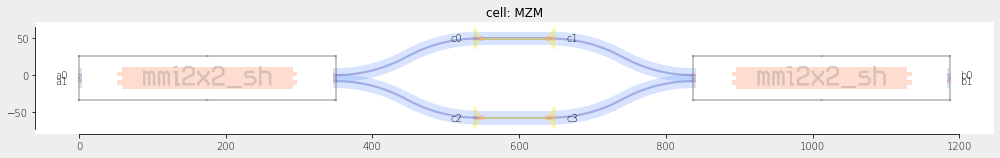

In [18]:
with nd.Cell(name='MZM') as MZM_bal:
    m1 = MMI.put()
    demo.shallow.sbend(offset=50.0).put()
    ps = PS.put(param_mapping={'PS': 'PS1'})
    demo.shallow.sbend(offset=-50.0).put()
    m2 = MMI.put()
    demo.shallow.sbend(offset=-50.0).put(m1.pin['b1'])
    ps2 = PS.put(param_mapping={'PS': 'PS2'})
    demo.shallow.sbend(offset=50.0).put()
    
    nd.Pin('a0', pin=m1.pin['a0']).put()
    nd.Pin('a1', pin=m1.pin['a1']).put()
    nd.Pin('b0', pin=m2.pin['b0']).put()
    nd.Pin('b1', pin=m2.pin['b1']).put()
    nd.Pin('c0', pin=ps.pin['c0']).put()
    nd.Pin('c1', pin=ps.pin['c1']).put()
    nd.Pin('c2', pin=ps2.pin['c0']).put()
    nd.Pin('c3', pin=ps2.pin['c1']).put()
        
nd.export_plt(topcells=MZM_bal)

In [19]:
#    DCp.put(400.0,300.0,180.0)
#    demo.metaldc.strt_bend_strt_p2p(ps.pin['c0']).put()
#    DCp.put(800.0,300.0,180.0)
#    demo.metaldc.strt_bend_strt_p2p(ps.pin['c1']).put()

#    DCp.put(200.0,300.0,180.0)
#    demo.metaldc.strt_bend_strt_p2p(ps2.pin['c0']).put()
#    DCp.put(1000.0,300.0,180.0)
#    demo.metaldc.strt_bend_strt_p2p(ps2.pin['c1']).put()

### Data extraction

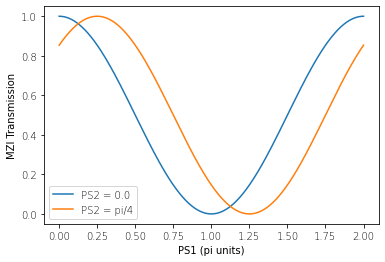

In [20]:
Sol = nd.get_solver(MZM_bal)

psl = np.linspace(0.0, 2.0, 501)

T1 = Sol.solve(wl=1.55, PS1 = psl, PS2 = 0.00).get_data('a0','b0')
T2 = Sol.solve(wl=1.55, PS1 = psl, PS2 = 0.25).get_data('a0','b0')

plt.plot(T1['PS1'], T1['T'], label = 'PS2 = 0.0')
plt.plot(T2['PS1'], T2['T'], label = 'PS2 = pi/4')
plt.xlabel('PS1 (pi units)')
plt.ylabel('MZI Transmission')
plt.legend()

# Future Improvements
- Handling multiple modes in the same waveguide (not show, but available)
- Improve models of BBs with real data from foundries
- Integration with electrical simulation (either inside the code or external tools)
- Whatever you want or need (keep in touch at https://nazca-design.org/forum/)
<img src="files/logo-nazca.png" width="300">